In [1]:
import requests
import pandas as pd

In [2]:
city = 'jakarta'

In [3]:
df = pd.read_csv('geo_sampling/{0:s}-roads-s1k.csv'.format(city))
#df = df.sample(10)

In [4]:
API_KEY = 'GOOGLE_MAPS_API_KEY'

## Get Google Maps Street View metadata

In [5]:
def gsv_metadata(lat, lon):
    data = {'key': API_KEY,
                'location':  '{0:f},{1:f}'.format(lat, lon)}
    r = requests.get('https://maps.googleapis.com/maps/api/streetview/metadata', params=data)
    if r.status_code == 200:
        return r.json()
    else:
        print("WARN: No metadata for {0:f},{1:f}".format(lat, lon))
        return None

In [6]:
df['gsv_metadata'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_metadata(r.start_lat, r.start_long), axis=1)

In [7]:
mdf = pd.concat([df, df.gsv_metadata.apply(pd.Series)], axis=1)

In [8]:
mdf[['osm_type', 'start_lat', 'start_long', 'date', 'status', 'pano_id', 'copyright']]

osm_type  start_lat  start_long     date status  \
0      primary  -6.180847  106.822621  2017-01     OK   
1     tertiary  -6.167753  106.842434  2017-01     OK   
2      primary  -6.156200  106.836681  2017-01     OK   
3      primary  -6.164970  106.838870  2017-01     OK   
4        trunk  -6.312436  106.838374  2017-01     OK   
5      primary  -6.321876  106.835844  2016-12     OK   
6      primary  -6.340446  106.835370  2017-01     OK   
7      primary  -6.303512  106.840793  2016-12     OK   
8        trunk  -6.291851  106.786394  2015-08     OK   
9      primary  -6.302603  106.854308  2017-01     OK   
10     primary  -6.225261  106.832839  2017-01     OK   
11   secondary  -6.305718  106.820568  2015-12     OK   
12   secondary  -6.296775  106.821233  2017-01     OK   
13     primary  -6.201741  106.823113  2016-12     OK   
14   secondary  -6.214215  106.887678  2017-01     OK   
15    tertiary  -6.201348  106.841137  2016-12     OK   
16   secondary  -6.224439  106.826661  2017-01     OK   
17    tertiary  -6.192719  106.825161  2017-01     OK   
18   secondary  -6.175903  106.832599  2017-01     OK   
19     primary  -6.180568  106.827772  2017-01     OK   
20     primary  -6.105752  106.696565  2015-06     OK   
21     primary  -6.108082  106.692695  2015-05     OK   
22    tertiary  -6.182848  106.829806  2017-01     OK   
23    tertiary  -6.187706  106.833374  2017-01     OK   
24    tertiary  -6.194571  106.830830  2016-12     OK   
25     primary  -6.202594  106.827854  2015-08     OK   
26     primary  -6.232999  106.811923  2017-01     OK   
27   secondary  -6.226849  106.806707  2017-01     OK   
28   secondary  -6.182758  106.918539  2016-12     OK   
29   secondary  -6.305886  106.814012  2017-01     OK   
..         ...        ...         ...      ...    ...   
970    primary  -6.167483  106.872534  2017-01     OK   
971   tertiary  -6.160123  106.855260  2017-01     OK   
972   tertiary  -6.120073  106.708443  2015-06     OK   
973   tertiary  -6.240252  106.934425  2016-12     OK   
974  secondary  -6.308174  106.874290  2017-01     OK   
975  secondary  -6.308347  106.874305  2016-12     OK   
976   tertiary  -6.279161  106.814350  2017-01     OK   
977   tertiary  -6.356220  106.799759  2017-01     OK   
978   tertiary  -6.356681  106.800985  2015-11     OK   
979   tertiary  -6.349251  106.808326  2017-07     OK   
980   tertiary  -6.347848  106.807288  2015-11     OK   
981   tertiary  -6.347980  106.799705  2017-01     OK   
982   tertiary  -6.345887  106.805348  2015-10     OK   
983   tertiary  -6.351549  106.810021  2017-01     OK   
984   tertiary  -6.347036  106.806671  2015-11     OK   
985  secondary  -6.305901  106.820549  2017-01     OK   
986   tertiary  -6.123646  106.844984  2015-05     OK   
987  secondary  -6.133452  106.916656  2015-11     OK   
988  secondary  -6.120833  106.859033  2013-04     OK   
989   tertiary  -6.173870  106.779975  2015-10     OK   
990   tertiary  -6.296468  106.790541  2017-01     OK   
991  secondary  -6.147389  106.866783  2015-10     OK   
992   tertiary  -6.141554  106.865639  2017-01     OK   
993      trunk  -6.166300  106.727175  2016-12     OK   
994  secondary  -6.305816  106.859180  2016-12     OK   
995      trunk  -6.166866  106.787824  2016-12     OK   
996      trunk  -6.165466  106.783588  2017-01     OK   
997      trunk  -6.161740  106.770869  2017-01     OK   
998      trunk  -6.158008  106.767970  2016-12     OK   
999  secondary  -6.227036  106.808076  2016-12     OK   

                                               pano_id        copyright  
0                               ZsuaCXoZMzBUiimX6wPgOg    © 2017 Google  
1                               IZDY6K-68eEZ_2Gn0UX7GQ    © 2017 Google  
2                               efaqkGpxjxArkRbc2_8Ezw    © 2017 Google  
3                               TOfUJy6Rmv1imEwasCct6w    © 2017 Google  
4                               mKRSPlWntlYFbMlq0rXvPA    © 2017 Google  
5                          

In [9]:
mdf.groupby('date').agg({'status': 'count'})

status
date           
2013-02       2
2013-03       7
2013-04      14
2013-05       1
2013-07       1
2013-08       1
2013-09       2
2014-10       1
2015-04       2
2015-05      30
2015-06      50
2015-07       1
2015-08      20
2015-09      12
2015-10      53
2015-11      35
2015-12      27
2016-01      11
2016-02       1
2016-05       5
2016-06       1
2016-07       4
2016-08       1
2016-12     297
2017-01     397
2017-02       1
2017-07       1

In [10]:
mdf[mdf.status != 'OK']

segment_id     osm_id                    osm_name   osm_type  start_lat  \
122         935   28788839           Jalan Dukuh Patra   tertiary  -6.238929   
220        1807   31226653                         NaN  secondary  -6.133497   
277        2268   32971044            Mandara Permai 1   tertiary  -6.119625   
278        2269   32971086                Bahtera Raya   tertiary  -6.118648   
340        2877   98570543                Raya Halim 3   tertiary  -6.268949   
591        4723  341084445    Jalan Raya Kosambi Timur    primary  -6.088985   
616        4931  361855770                         NaN   tertiary  -6.195025   
621        4983  368641327                         NaN   tertiary  -6.259290   
634        5099  404125167                         NaN  secondary  -6.308399   
647        5176  426533514  Jalan Inspeksi Kanal Timur   tertiary  -6.152113   
648        5178  426533514  Jalan Inspeksi Kanal Timur   tertiary  -6.143083   
745        5867  482882621                         NaN   tertiary  -6.159567   
757        5919  484449420       Jalan Sungai Ciliwung   tertiary  -6.218627   
821        6396  491739759                         NaN   tertiary  -6.261897   
853        6614  494607317          Jalan Prapatan III   tertiary  -6.178872   
862        6665  495425545           Jalan Elang Prima   tertiary  -6.309476   
875        6760  496601816    Jalan H. Murtadho Gang X   tertiary  -6.197572   
876        6761  496601817   Jalan H. Murtadho Gang XI   tertiary  -6.197688   
883        6844  497093775    Jalan Kemayoran Ketapang   tertiary  -6.214978   
884        6845  497093775    Jalan Kemayoran Ketapang   tertiary  -6.219497   
890        6895  497578494                         NaN   tertiary  -6.259024   
928        7161  502270485                 Jalan Nonin   tertiary  -6.336926   

     start_long   end_lat    end_long                  gsv_metadata copyright  \
122  106.834421 -6.238740  106.834027  {u'status': u'ZERO_RESULTS'}       NaN   
220  106.800713 -6.133564  106.799453  {u'status': u'ZERO_RESULTS'}       NaN   
277  106.772792 -6.117897  106.772620  {u'status': u'ZERO_RESULTS'}       NaN   
278  106.765738 -6.119012  106.769973  {u'status': u'ZERO_RESULTS'}       NaN   
340  106.893899 -6.275060  106.893163  {u'status': u'ZERO_RESULTS'}       NaN   
591  106.704870 -6.092187  106.708598  {u'status': u'ZERO_RESULTS'}       NaN   
616  106.717680 -6.195093  106.717663  {u'status': u'ZERO_RESULTS'}       NaN   
621  106.894662 -6.258269  106.894672  {u'status': u'ZERO_RESULTS'}       NaN   
634  106.892594 -6.309070  106.892185  {u'status': u'ZERO_RESULTS'}       NaN   
647  106.970382 -6.147595  106.970240  {u'status': u'ZERO_RESULTS'}       NaN   
648  106.970030 -6.138625  106.969294  {u'status': u'ZERO_RESULTS'}       NaN   
745  106.961583 -6.159366  106.966094  {u'status': u'ZERO_RESULTS'}       NaN   
757  106.861853 -6.216252  106.863795  {u'status': u'ZERO_RESULTS'}       NaN   
821  106.892998 -6.261965  106.893080  {u'status': u'ZERO_RESULTS'}       NaN   
853  106.837676 -6.179133  106.837117  {u'status': u'ZERO_RESULTS'}       NaN   
862  106.846170 -6.304646  106.842830  {u'status': u'ZERO_RESULTS'}       NaN   
875  106.853927 -6.196715  106.853303  {u'status': u'ZERO_RESULTS'}       NaN   
876  106.853791 -6.198484  106.853042  {u'status': u'ZERO_RESULTS'}       NaN   
883  106.850176 -6.219497  106.850316  {u'status': u'ZERO_RESULTS'}       NaN   
884  106.850316 -6.224015  106.850455  {u'status': u'ZERO_RESULTS'}       NaN   
890  106.888458 -6.259674  106.889384  {u'status': u'ZERO_RESULTS'}       NaN   
928  106.822494 -6.337519  106.823914  {u'status': u'ZERO_RESULTS'}       NaN   

    date location pano_id        status  
122  NaN      NaN     NaN  ZERO_RESULTS  
220  NaN      NaN     NaN  ZERO_RESULTS  
277  NaN      NaN     NaN  ZERO_RESULTS  
278  NaN      NaN     NaN  ZERO_RESULTS  
340  NaN      NaN     NaN  ZERO_RESULTS  
591  NaN      NaN     NaN  ZERO_RESULTS  
616  N

In [11]:
df = mdf[mdf.status == 'OK'].copy()

## Get Google Maps Street View Image

In [12]:
from base64 import b64encode, b64decode

def gsv_image(lat, lon, heading=0, pitch=0, size='640x640'):
    data = {'key': API_KEY,
                'location':  '{0:f},{1:f}'.format(lat, lon),
                'heading': '{0:d}'.format(heading),
                'pitch': '{0:d}'.format(pitch),
                'size': size}
    r = requests.get('https://maps.googleapis.com/maps/api/streetview', params=data)
    if r.status_code == 200:
        return b64encode(r.content)
    else:
        print(r.status_code)
        print(r.text)
        print("WARN: No image data for {0:f},{1:f}".format(lat, lon))
        return None

In [13]:
df['img0'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 0, -15), axis=1)
df['img90'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 90, -15), axis=1)
df['img180'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 180, -15), axis=1)
df['img270'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 270, -15), axis=1)

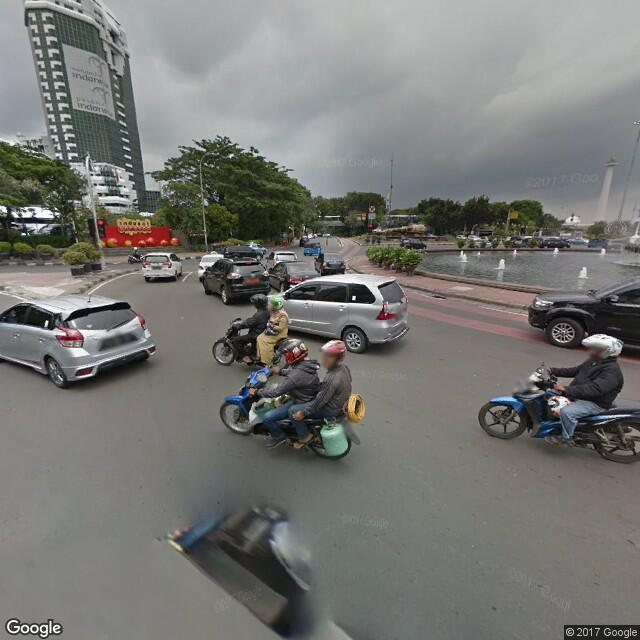

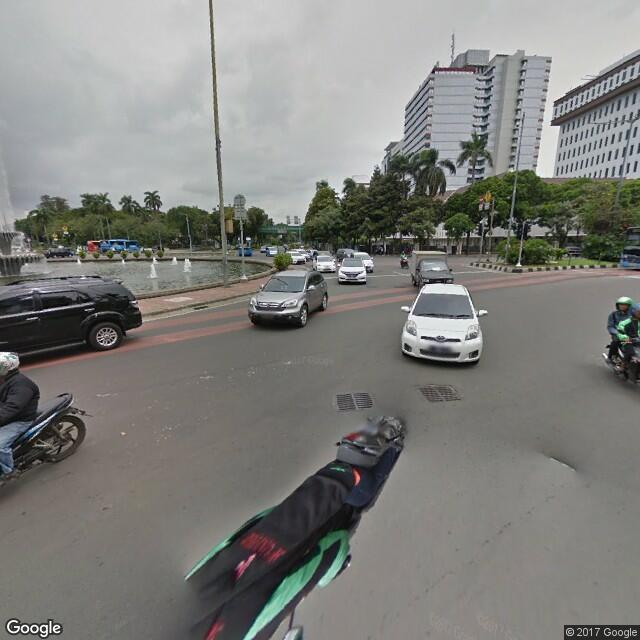

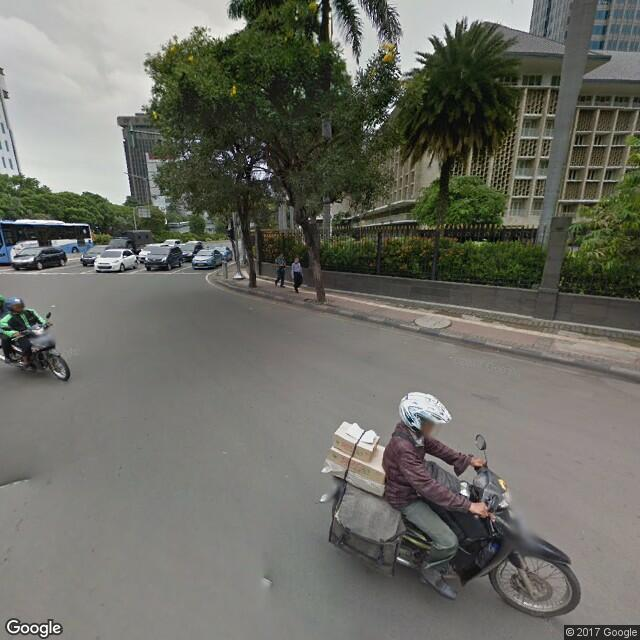

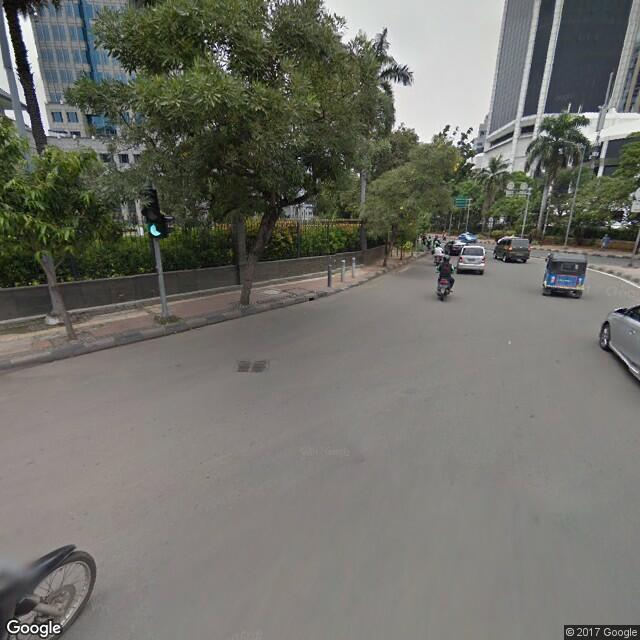

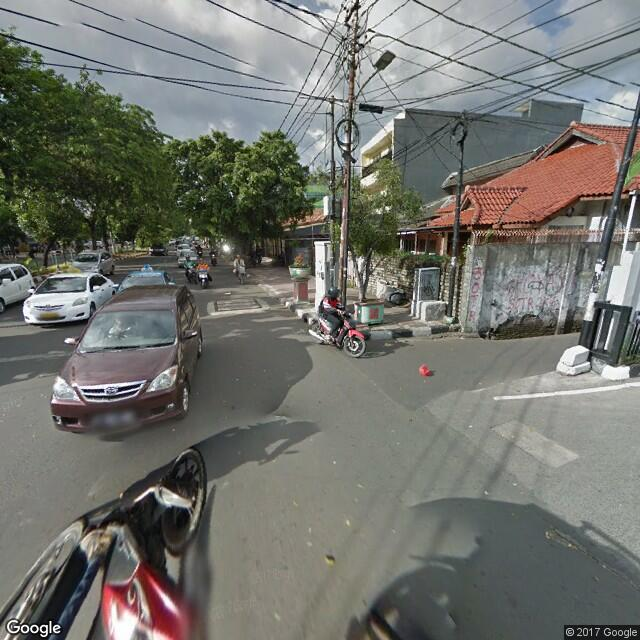

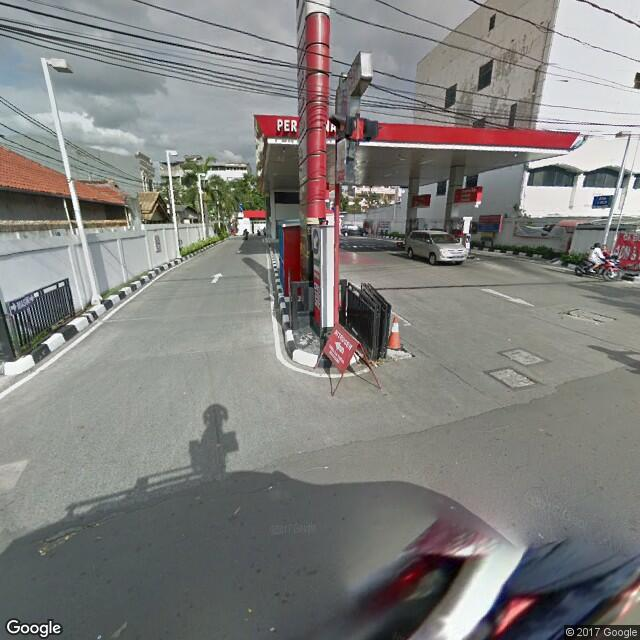

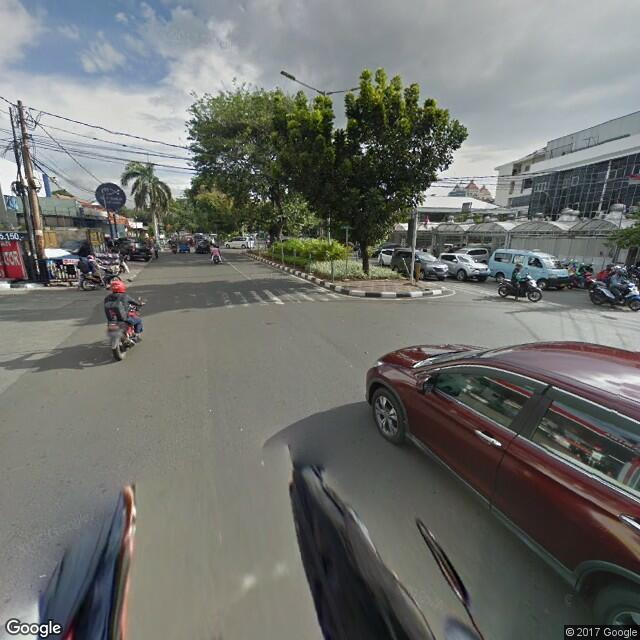

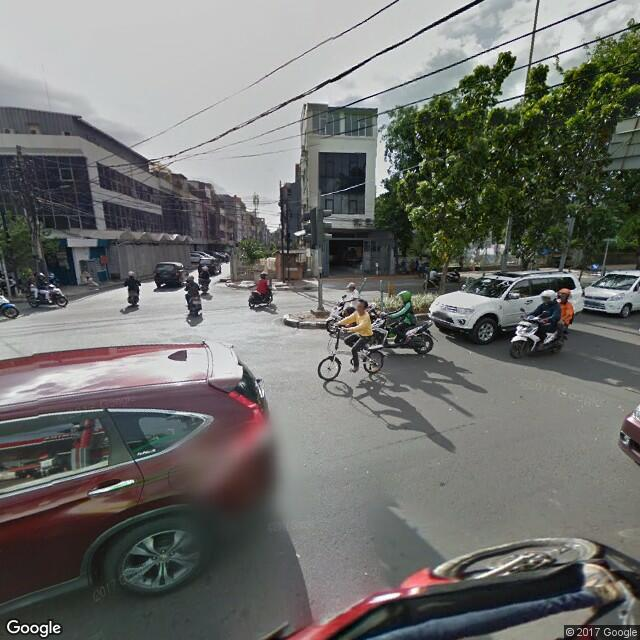

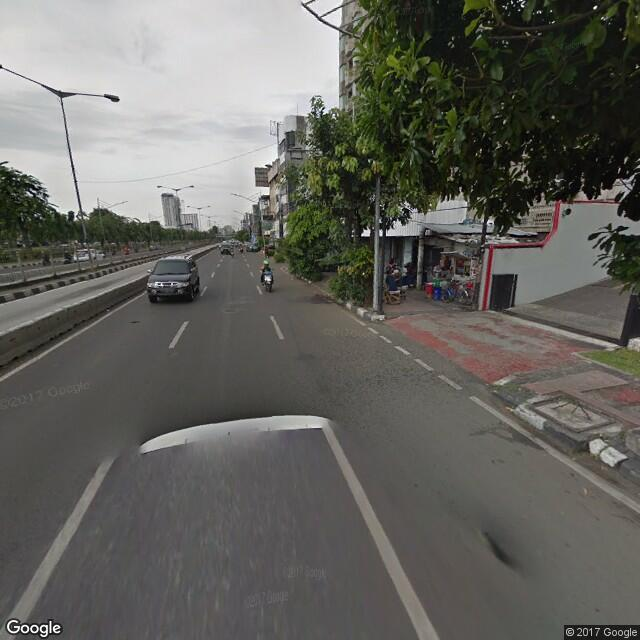

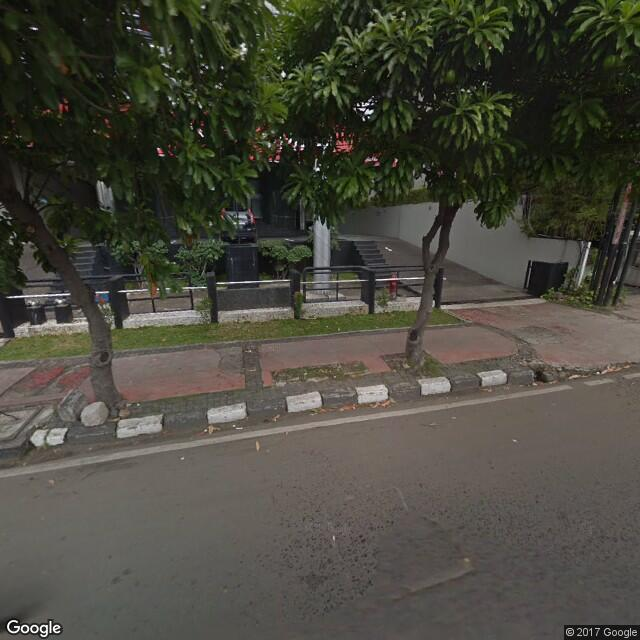

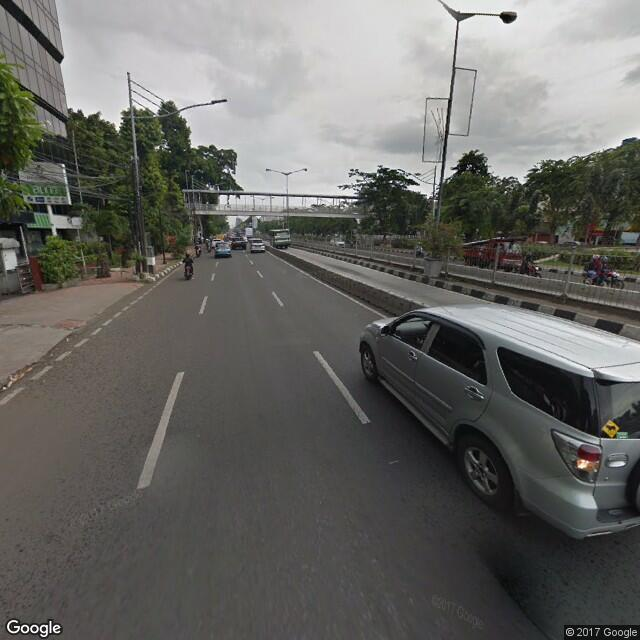

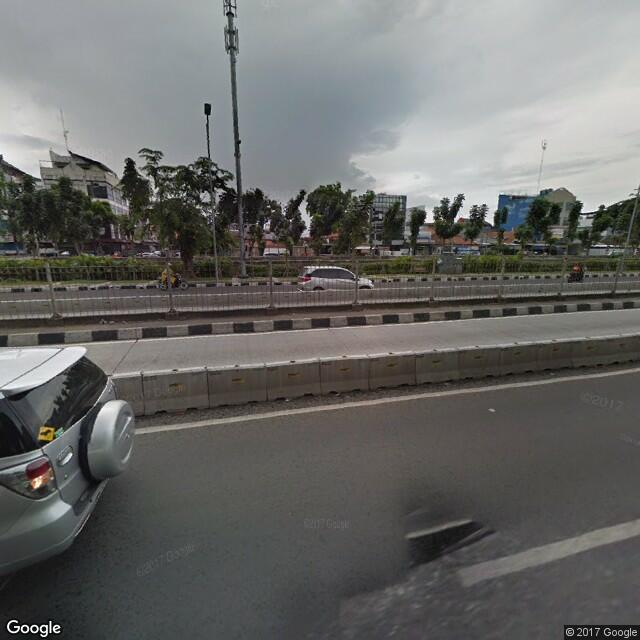

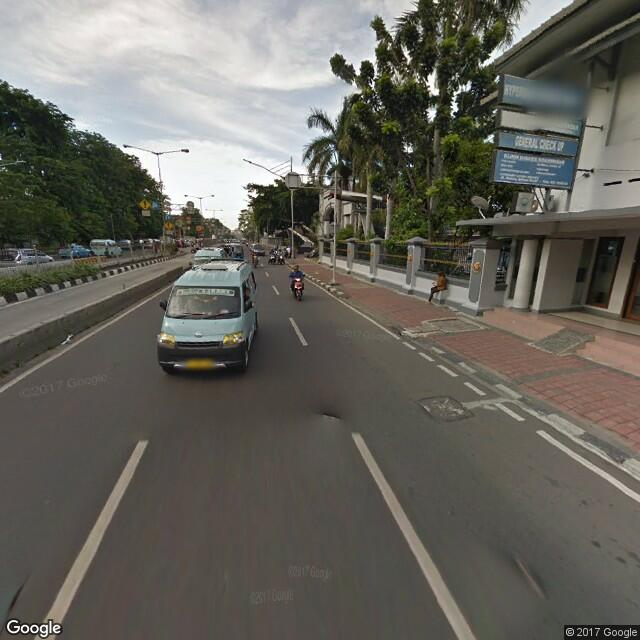

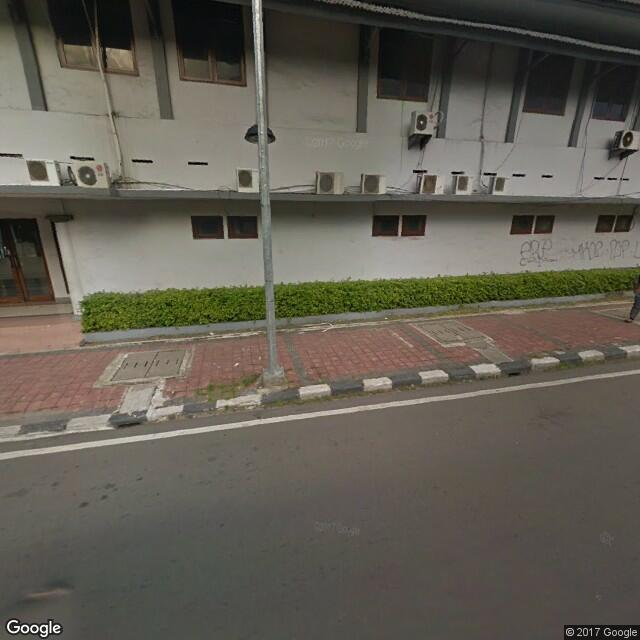

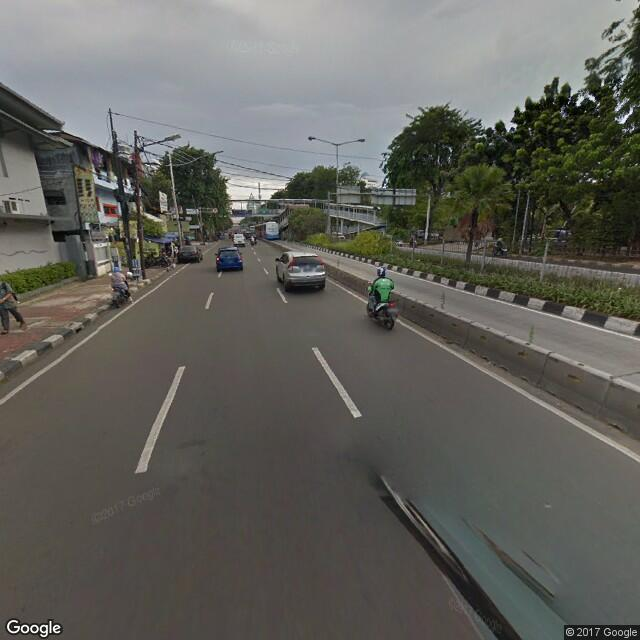

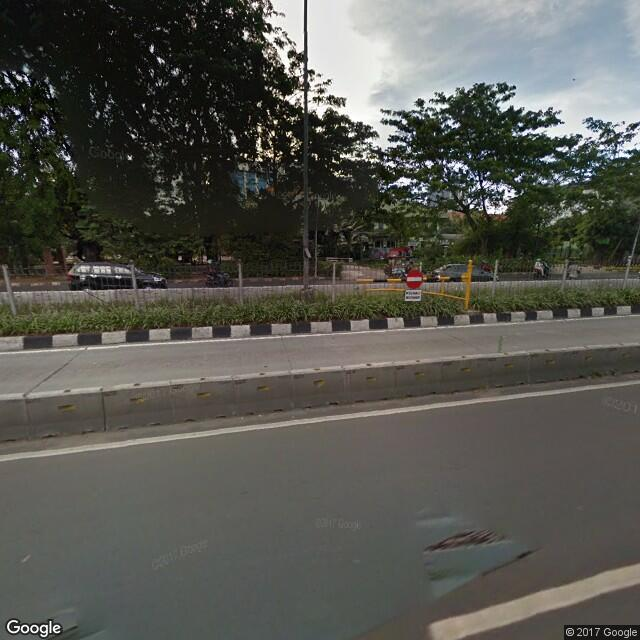

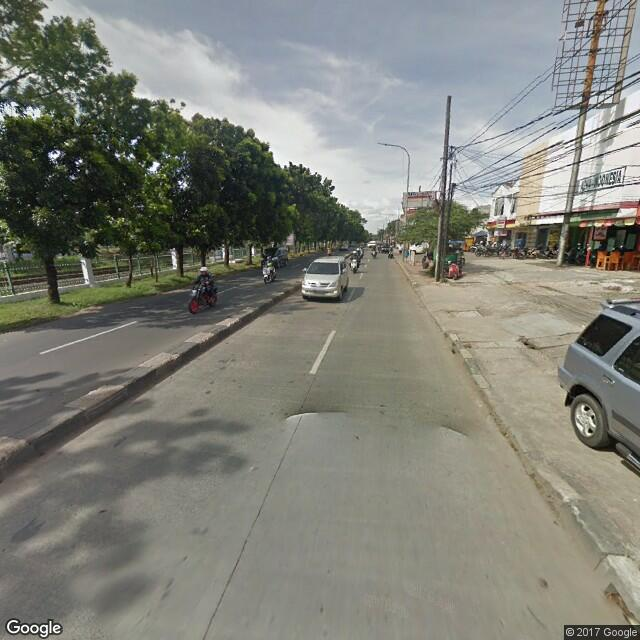

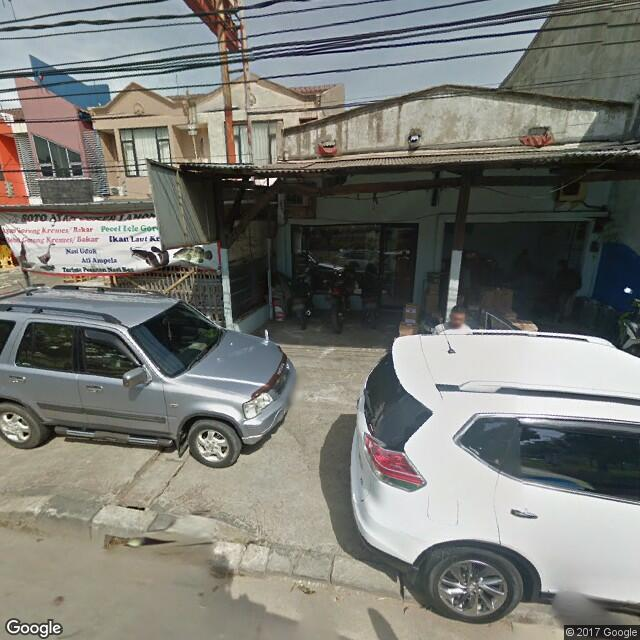

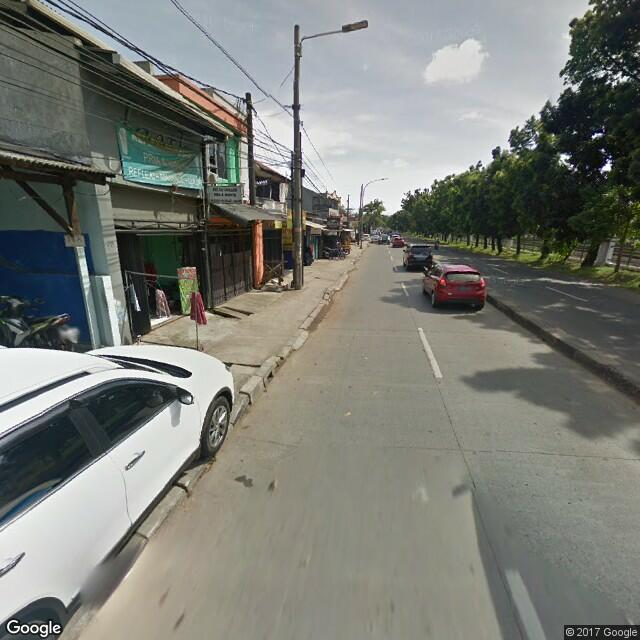

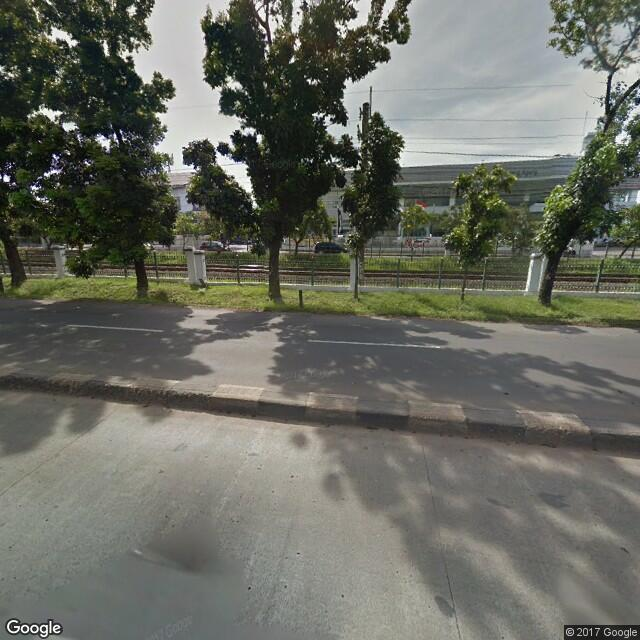

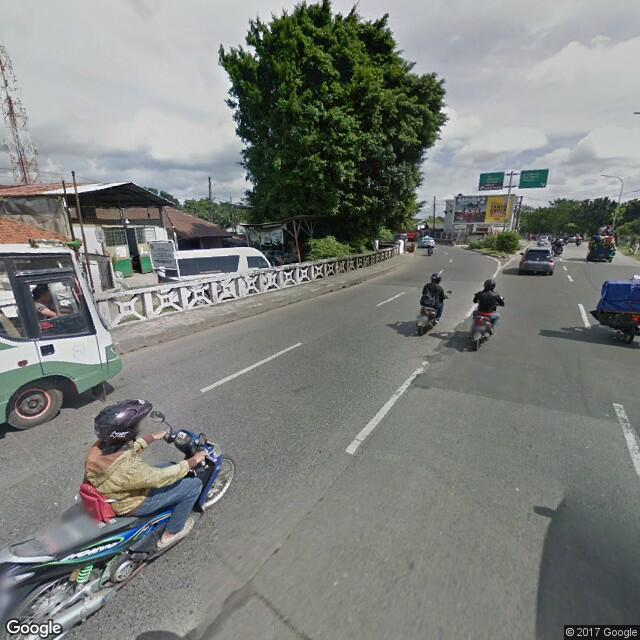

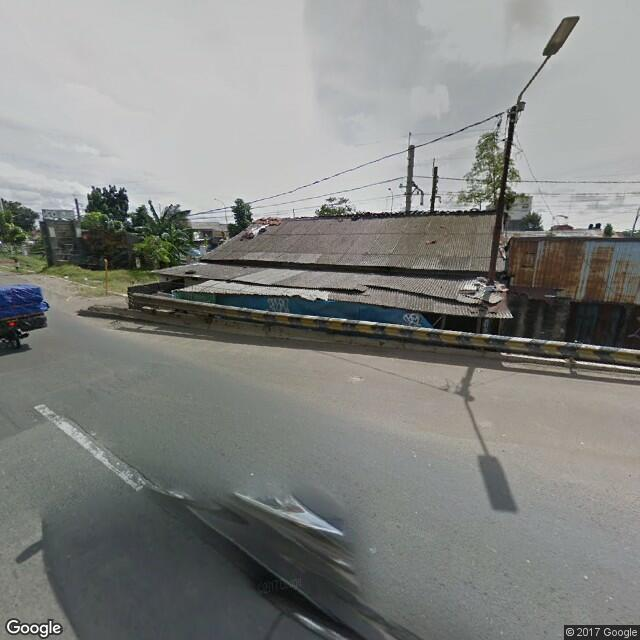

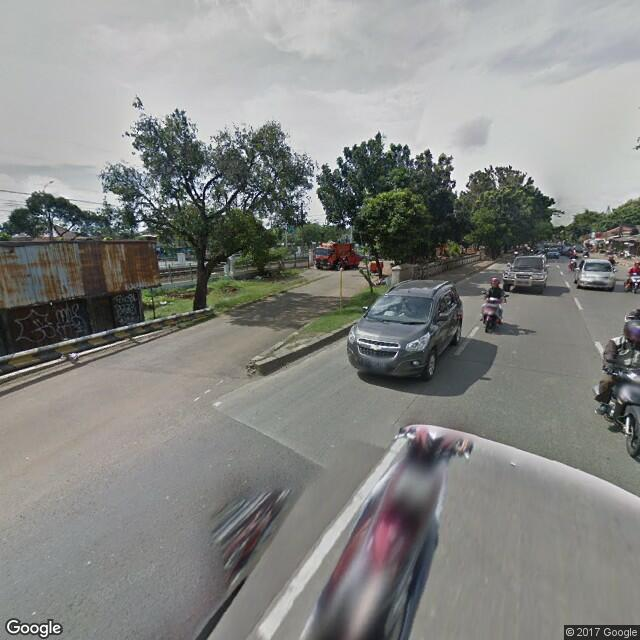

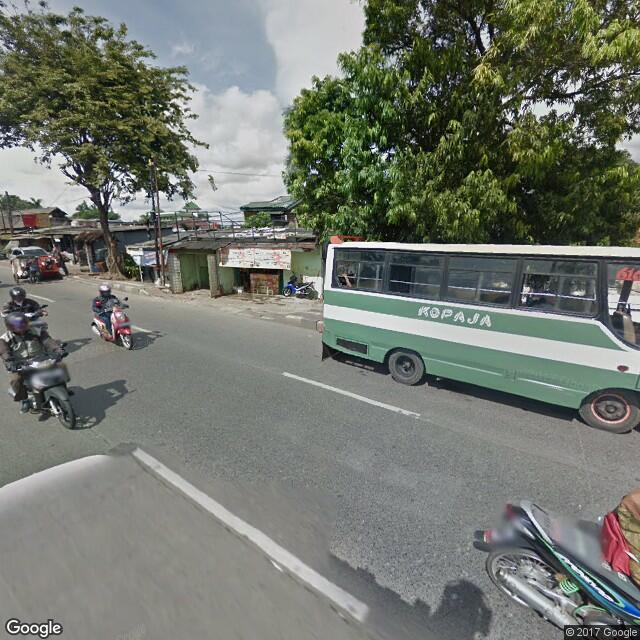

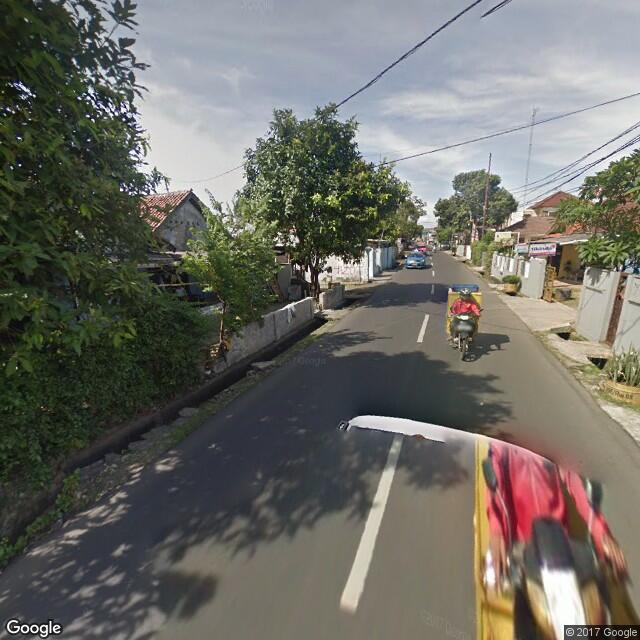

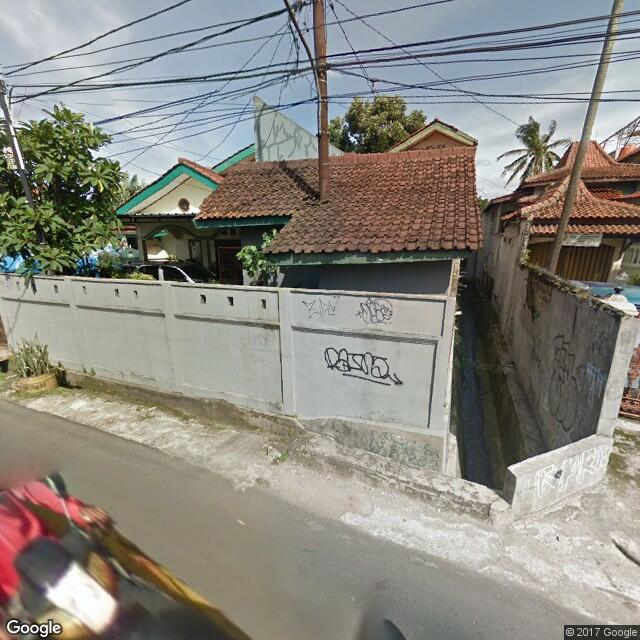

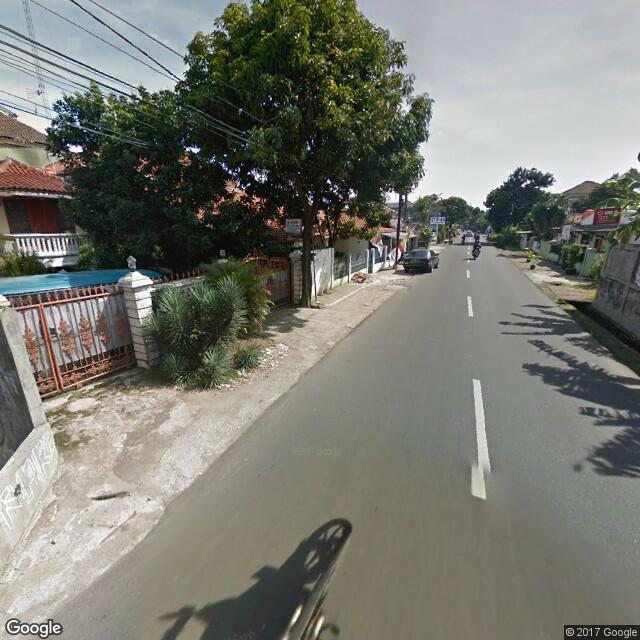

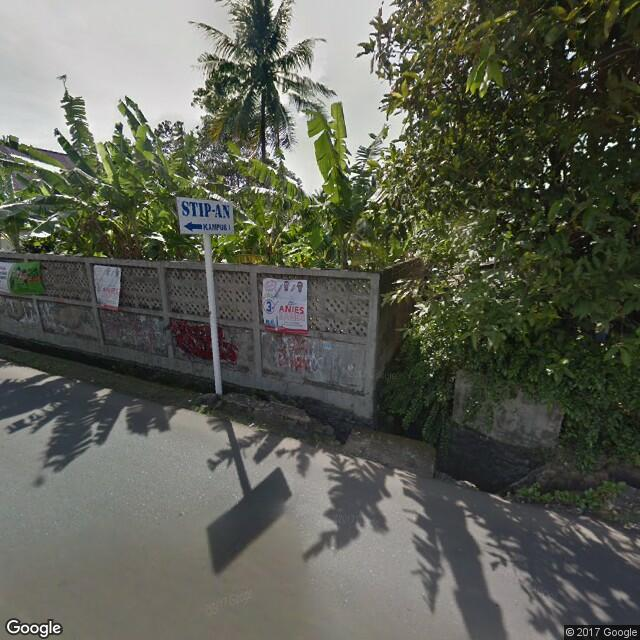

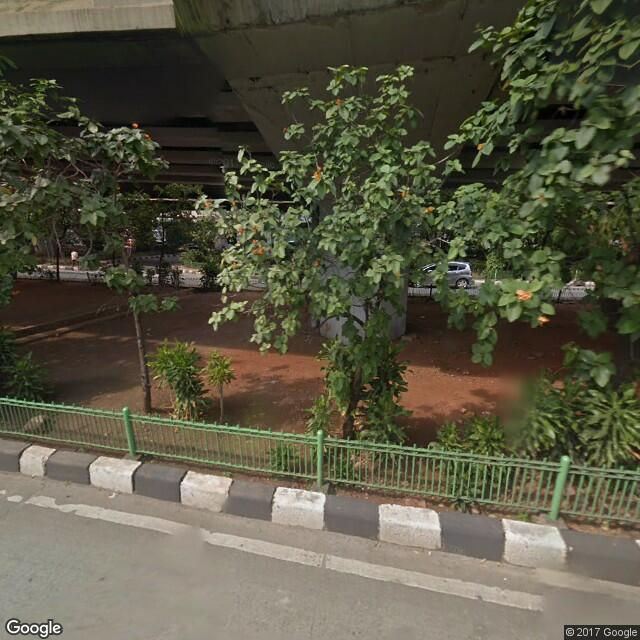

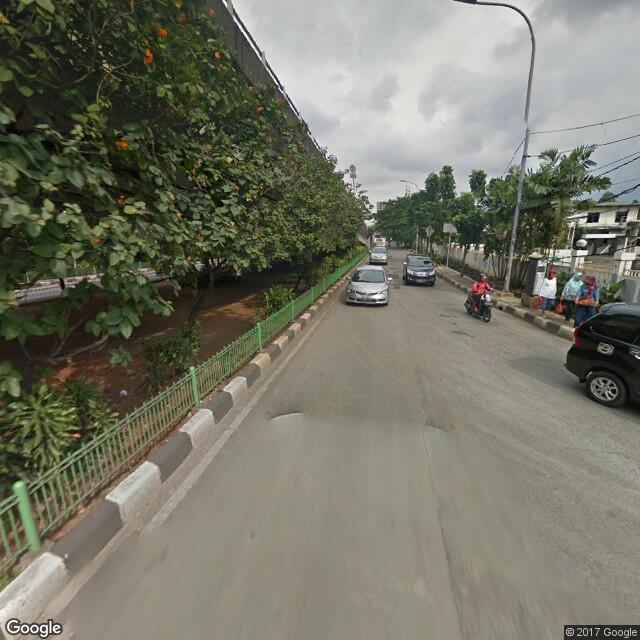

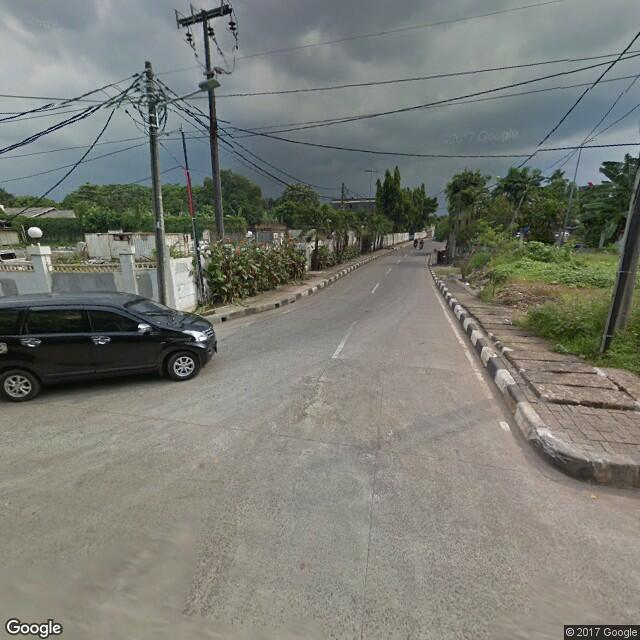

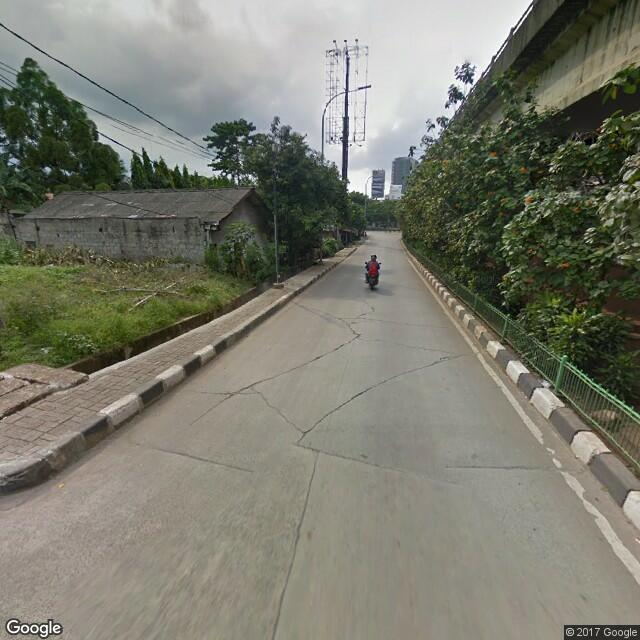

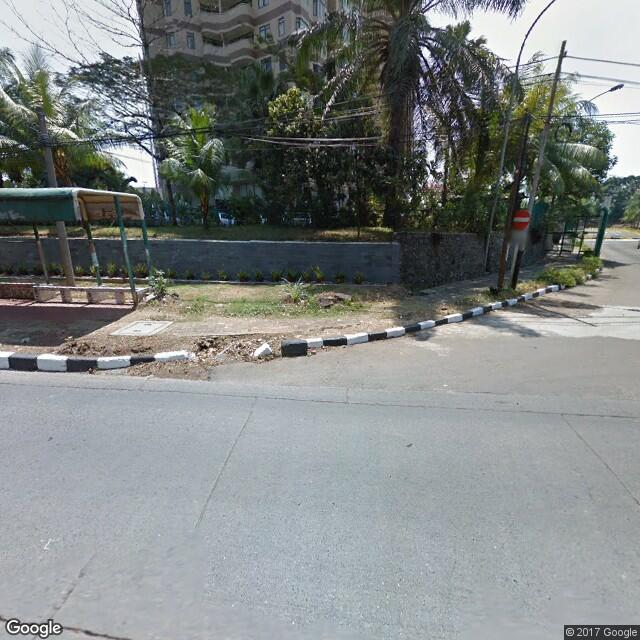

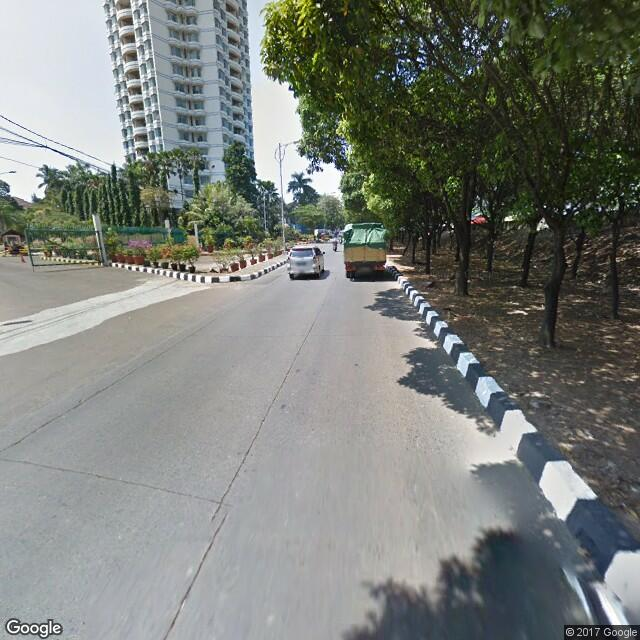

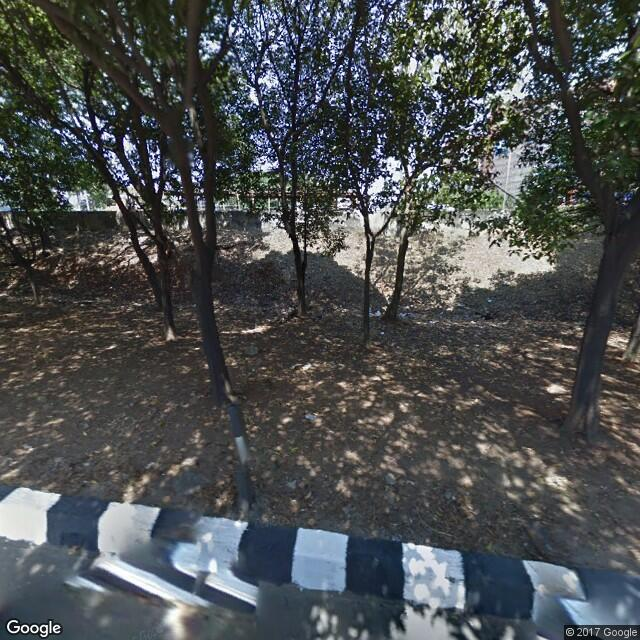

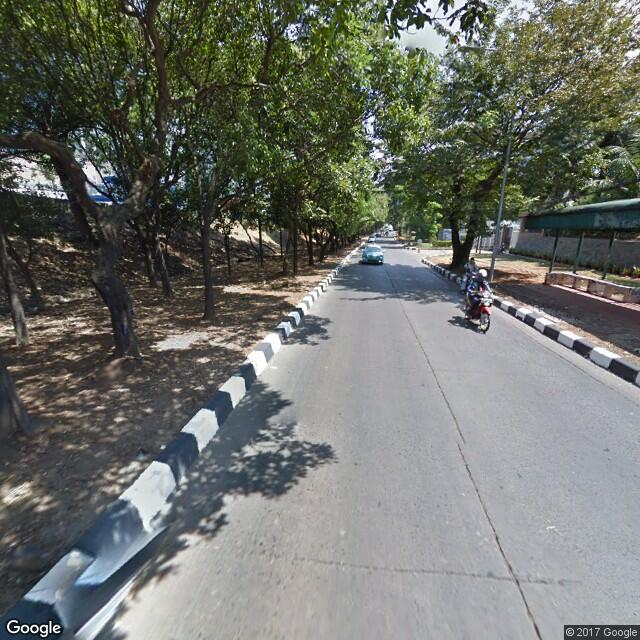

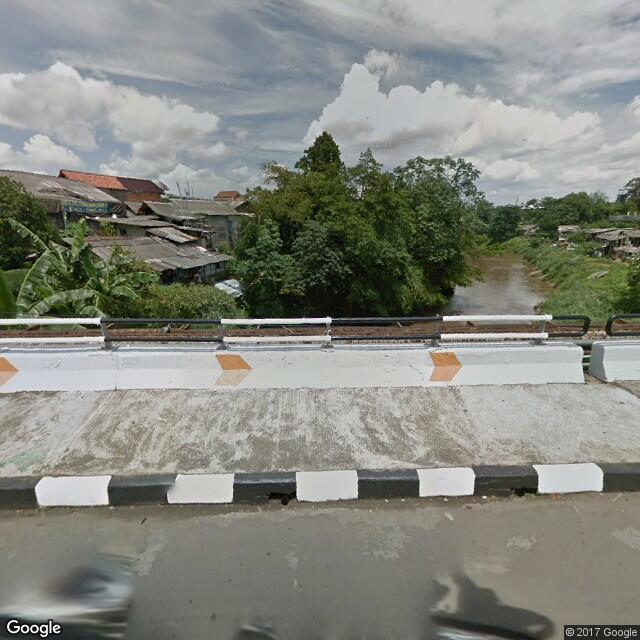

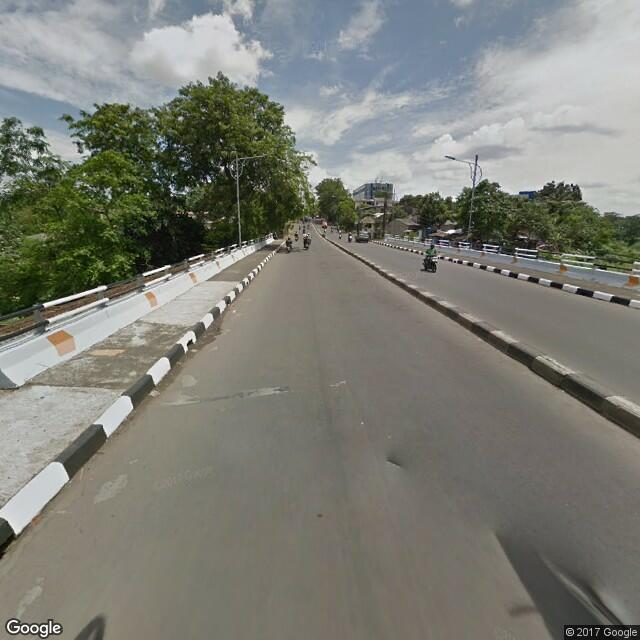

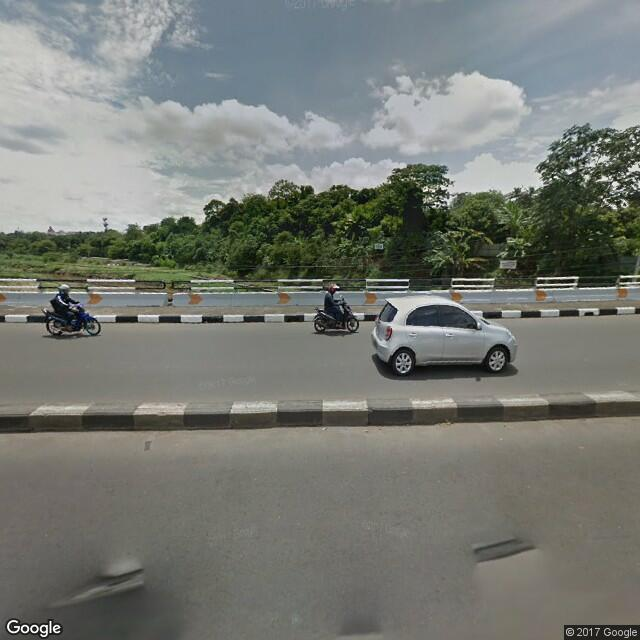

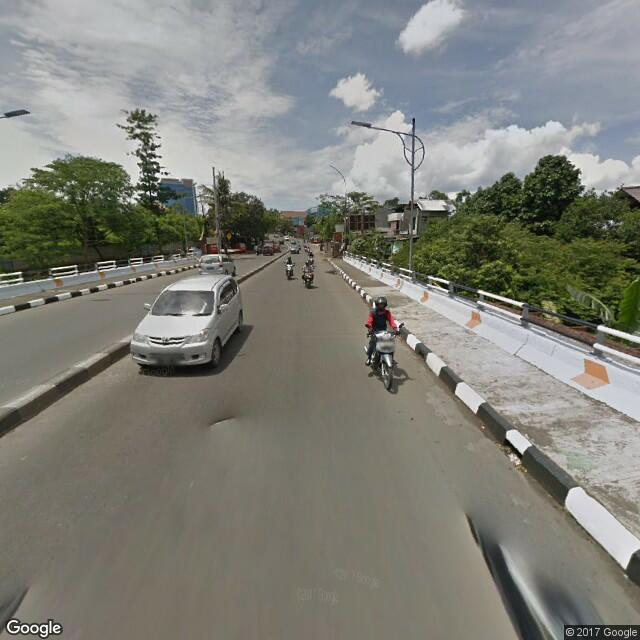

In [14]:
#from ipywidgets import Image
from IPython.display import Image
from IPython.display import display

imgs = ['img0', 'img90', 'img180', 'img270']
images = []
for row in df[imgs].itertuples(index=False):
    for i in xrange(len(imgs)):
        img = Image(data=b64decode(row[i]), width="640px")
        images.append(img)

display(*images[:10*4])

## Subplot

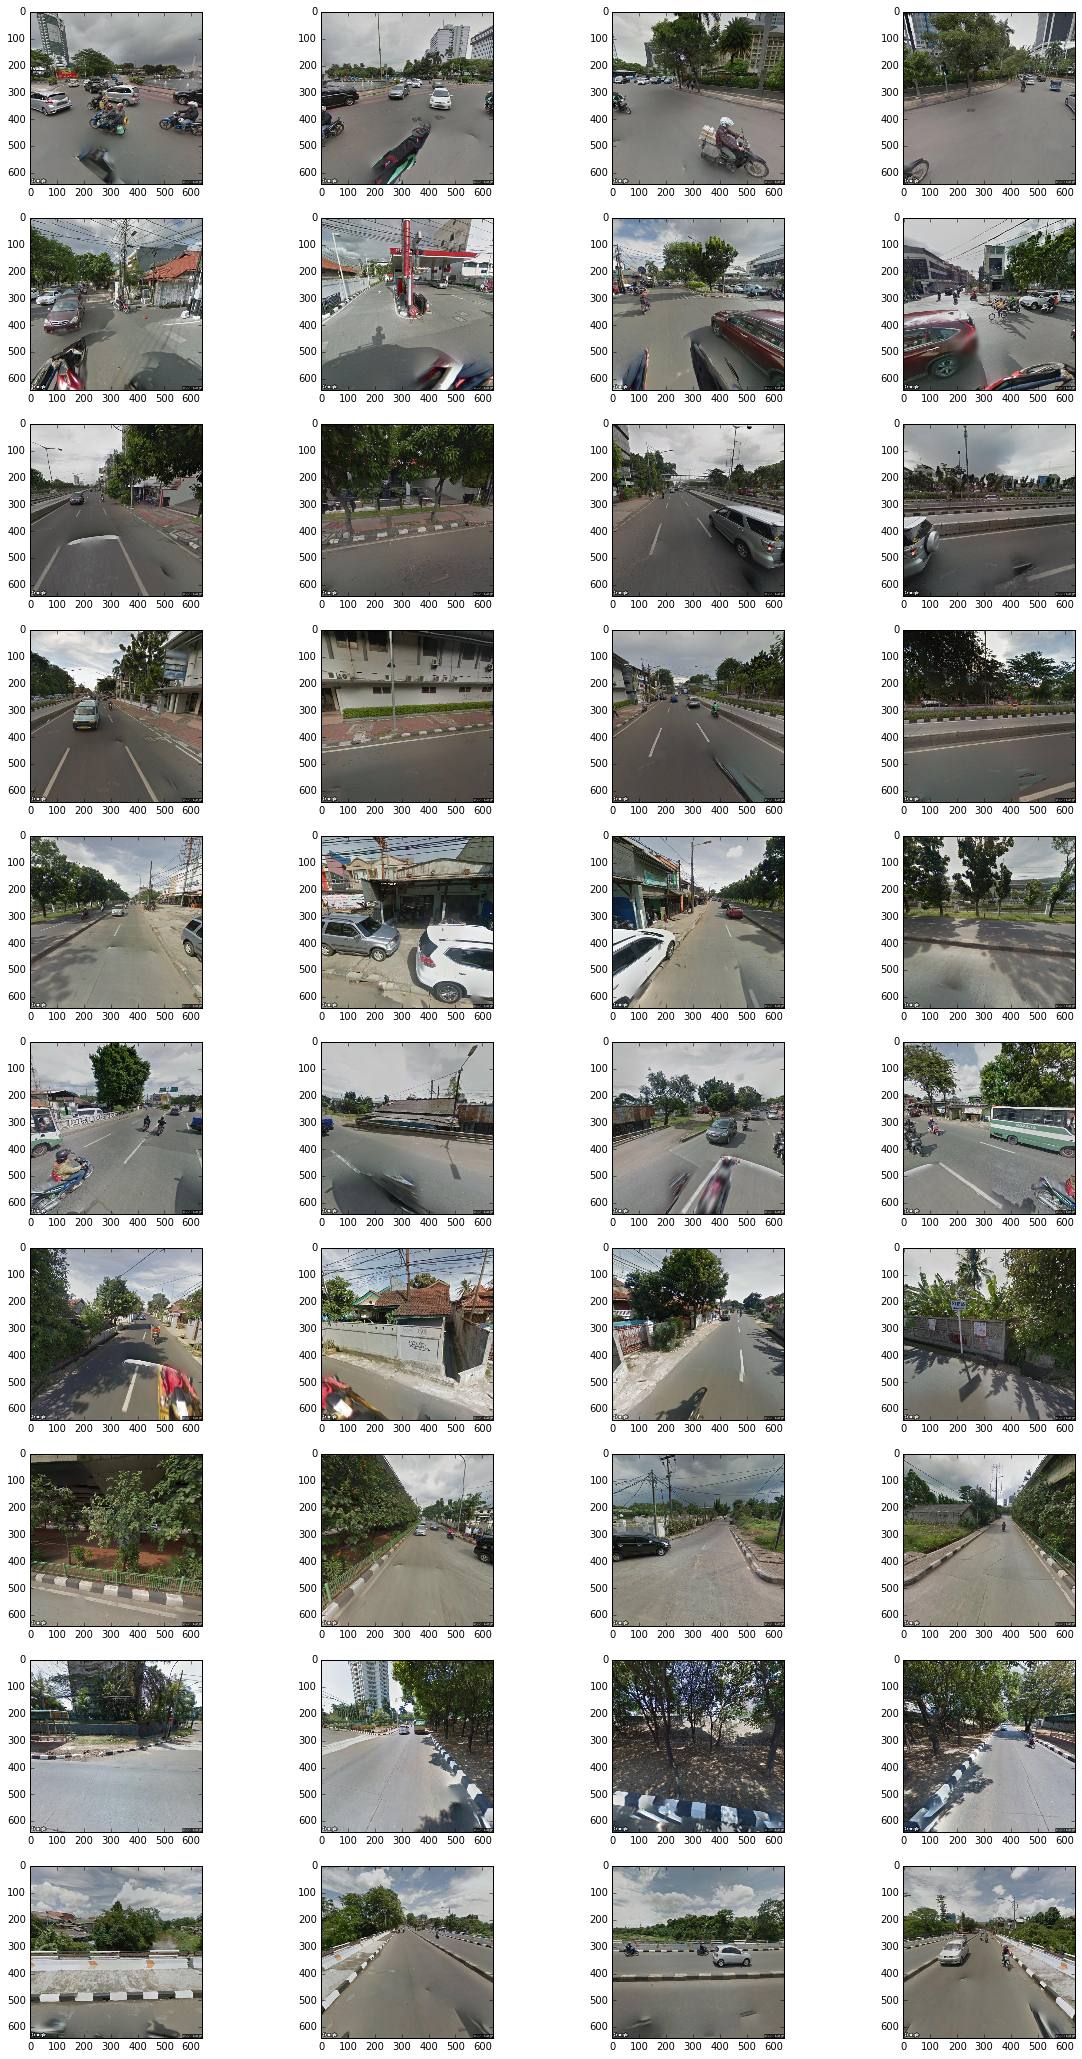

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image as PILImage
from cStringIO import StringIO

plotimages = images[:4*10]
plt.figure(figsize=(20, 40))
columns = 4
for i, image in enumerate(plotimages):
    plt.subplot(len(plotimages) / columns + 1, columns, i + 1)
    img = PILImage.open(StringIO(image.data))
    plt.imshow(img)


## Export Data for Mturk

In [16]:
df.to_csv('{0:s}-roads-gsv.csv.gz'.format(city), index_label='id', encoding='utf-8', compression='gzip')

In [17]:
def export_image_to_file(i, data, basename):
    url = '{0:s}{1:04d}.jpg'.format(basename, i)
    with open('mturk/' + url, 'wb') as f:
        raw = b64decode(data)
        f.write(raw)
    return url

In [18]:
rdf = pd.read_csv('{0:s}-roads-gsv.csv.gz'.format(city))

In [20]:
rdf['url_img0'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img0, '{0:s}/img0_'.format(city)), axis=1)
rdf['url_img90'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img90, '{0:s}/img90_'.format(city)), axis=1)
rdf['url_img180'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img180, '{0:s}/img180_'.format(city)), axis=1)
rdf['url_img270'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img270, '{0:s}/img270_'.format(city)), axis=1)

In [21]:
del rdf['img0']
del rdf['img90']
del rdf['img180']
del rdf['img270']
rdf.to_csv('mturk/{0:s}.csv'.format(city), index=False)